<a href="https://colab.research.google.com/github/MrZekron/Aplicacion1/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso titanic - Moises Cid
¿Que factor influyo en la supervivencia de los pasajeros?

*Género:

Las mujeres tenían una tasa de supervivencia significativamente mayor que los hombres.

Esto refleja la política de evacuación "mujeres y niños primero".

Clase del Pasajero:

Los pasajeros de primera clase tenían una mayor tasa de supervivencia en comparación con los de segunda y tercera clase.

Esto sugiere que las personas con mejores recursos tenían más acceso a los botes salvavidas.

Edad:

Los niños tenían una tasa de supervivencia mayor que los adultos, especialmente en primera y segunda clase.

Esto refuerza la idea de que los niños fueron priorizados en la evacuación.

Tamaño del Grupo (Familiares a Bordo):

Los pasajeros que viajaban con familiares tenían una tasa de supervivencia mayor en comparación con los que viajaban solos.

Esto puede deberse a que los grupos familiares colaboraban en la evacuación.

Tarifa del Boleto:

Se encontró que los pasajeros que pagaron tarifas más altas tenían más posibilidades de sobrevivir, lo que está correlacionado con viajar en clases más altas.

Conclusión:
Los factores más determinantes en la supervivencia fueron el género (las mujeres tenían más posibilidades de sobrevivir), la clase del pasajero (primera clase tenía ventaja), la edad (los niños tenían más posibilidades de ser rescatados), y viajar acompañado (los que iban en familia sobrevivieron más que los que estaban solos).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
file_path = "Titanic01.csv"
df = pd.read_csv(file_path)

PassengerId: Identificador único del pasajero.

Survived: Indica si sobrevivió (1) o no (0).

Pclass: Clase del pasajero (1, 2 o 3).

Name: Nombre del pasajero.

Sex: Género (male o female).

Age: Edad del pasajero.

SibSp: Número de hermanos/as o cónyuges a bordo.

Parch: Número de padres/madres o hijos/as a bordo.

Ticket: Número de boleto.

Fare: Tarifa pagada.

Cabin: Número de cabina (la mayoría de los valores son nulos).

Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).


Este conjunto de variables ofrece un panorama diverso de los pasajeros del Titanic, abarcando aspectos demográficos, socioeconómicos, familiares y relacionados con el viaje. La variable Survived es el foco principal de análisis, ya que se buscará identificar patrones y relaciones entre las demás variables que puedan explicar la supervivencia o la falta de ella.

La presencia de valores nulos en variables como Age y Cabin requerirá estrategias de limpieza y preprocesamiento de datos antes de realizar análisis más profundos. La combinación de variables cualitativas (como Sex y Embarked) y cuantitativas (como Age y Fare) permitirá un análisis multifacético de los factores que influyeron en la supervivencia de los pasajeros del Titanic.

In [ ]:
# Mostrar información general
df.info()

# Mostrar las primeras filas del dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Al ejecutar df.info() y df.head() en el conjunto de datos del Titanic, se obtiene una visión general inicial esencial de la estructura y contenido del dataset.

df.info() revela la cantidad de pasajeros, las columnas con sus tipos de datos y posibles valores faltantes. Esto es crucial para la planificación de la limpieza y preprocesamiento de datos, identificando áreas que requieren atención especial.

Por otro lado, df.head() permite visualizar las primeras filas de datos, proporcionando una comprensión tangible de cómo se organiza la información y los valores que contiene cada columna. Esto ayuda a familiarizarse con el dataset y detectar patrones o anomalías a simple vista.

En resumen, la combinación de df.info() y df.head() provee una base sólida para el análisis exploratorio de datos, permitiendo al usuario comprender la naturaleza del conjunto de datos del Titanic antes de profundizar en análisis más complejos. Esta información es clave para la toma de decisiones informadas en etapas posteriores del análisis.

Espero que esta conclusión sea útil. Si necesitas profundizar en algún aspecto en particular, no dudes en preguntarme.

In [ ]:
# Cantidad de registros y columnas
print(f"Cantidad de registros: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de registros: 891
Cantidad de columnas: 12


| Atributo | Tipo de dato | Cualitativo/Cuantitativo | Nominal/Ordinal | Numérico/Continuo | Codificado |
|---|---|---|---|---|---|
| PassengerId | Cuantitativo | Discreto | Numérico | No |
| Survived | Cualitativo | Nominal | Numérico | Sí (0/1) |
| Pclass | Cualitativo | Ordinal | Numérico | Sí (1/2/3) |
| Name | Cualitativo | Nominal | Texto | No |
| Sex | Cualitativo | Nominal | Texto | No |
| Age | Cuantitativo | Continuo | Numérico | No |
| SibSp | Cuantitativo | Discreto | Numérico | No |
| Parch | Cuantitativo | Discreto | Numérico | No |
| Ticket | Cualitativo | Nominal | Alfanumérico | No |
| Fare | Cuantitativo | Continuo | Numérico | No |
| Cabin | Cualitativo | Nominal | Alfanumérico | No |
| Embarked | Cualitativo | Nominal | Texto | Sí (C/Q/S) |

te brinda una visión completa de las características de cada atributo, permitiéndote abordar el análisis del dataset Titanic de forma más informada y eficiente.

Esta información es esencial para realizar análisis exploratorios de datos, construir modelos predictivos y extraer conclusiones significativas a partir de la información del Titanic.

In [ ]:
# Cantidad de valores únicos por atributo
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


El análisis de la cantidad de valores únicos por atributo en el dataset del Titanic nos proporciona información valiosa sobre la naturaleza de los datos y la variabilidad de cada columna. Esto es fundamental para realizar análisis exploratorios de datos, identificar patrones, comprender las relaciones entre las variables y, en última instancia, extraer conclusiones significativas sobre los factores que influyeron en la supervivencia de los pasajeros del Titanic.

In [ ]:
# Valores únicos por atributo
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")  # Mostrar solo los primeros 10 valores únicos

PassengerId: [ 1  2  3  4  5  6  7  8  9 10]
Survived: [0 1]
Pclass: [3 1 2]
Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
Sex: ['male' 'female']
Age: [22. 38. 26. 35. nan 54.  2. 27. 14.  4.]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']
Fare: [ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78']
Embarked: ['S' 'C' 'Q' nan]


Este código es una herramienta útil en la etapa de análisis exploratorio de datos. Proporciona una visión general de los valores presentes en cada columna del dataset del Titanic, lo cual facilita la comprensión de la estructura y el contenido de los datos. Esto es fundamental para la toma de decisiones en las siguientes etapas del análisis, como la limpieza, preprocesamiento y modelado de datos.

In [ ]:
# Contar valores nulos
total_nulls = df.isnull().sum()
print("Valores nulos por columna:")
print(total_nulls)

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


La salida muestra el nombre de cada columna del DataFrame df seguido de la cantidad de valores nulos que contiene.
En este ejemplo, podemos observar que la columna 'Age' tiene 177 valores nulos, 'Cabin' tiene 687 valores nulos y 'Embarked' tiene 2 valores nulos. Las demás columnas no tienen valores nulos.

| Atributo | Tipo de dato | Cualitativo/Cuantitativo | Nominal/Ordinal | Numérico/Continuo | Codificado | Interpretación de Origen |
|---|---|---|---|---|---|---|
| PassengerId | int64 | Cuantitativo | Numérico | Discreto | No | Identificador único asignado a cada pasajero |
| Survived | int64 | Cualitativo | Nominal | Discreto | Sí (0/1) | Indica si el pasajero sobrevivió (1) o no (0) |
| Pclass | int64 | Cualitativo | Ordinal | Discreto | Sí (1/2/3) | Clase del pasajero (1ra, 2da o 3ra) |
| Name | object | Cualitativo | Nominal | - | No | Nombre del pasajero |
| Sex | object | Cualitativo | Nominal | - | No | Género del pasajero (masculino o femenino) |
| Age | float64 | Cuantitativo | Numérico | Continuo | No | Edad del pasajero en años |
| SibSp | int64 | Cuantitativo | Numérico | Discreto | No | Número de hermanos/as o cónyuges a bordo |
| Parch | int64 | Cuantitativo | Numérico | Discreto | No | Número de padres/madres o hijos/as a bordo |
| Ticket | object | Cualitativo | Nominal | - | No | Número de ticket del pasajero |
| Fare | float64 | Cuantitativo | Numérico | Continuo | No | Tarifa pagada por el pasajero |
| Cabin | object | Cualitativo | Nominal | - | No | Número de cabina del pasajero |
| Embarked | object | Cualitativo | Nominal | Discreto | Sí (C/Q/S) | Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton) |


La tabla proporciona una descripción detallada de los atributos del conjunto de datos del Titanic. Esta información es fundamental para comprender la estructura y el contenido del dataset, lo que permite realizar análisis exploratorios de datos, construir modelos predictivos y extraer conclusiones significativas sobre los factores que influyeron en la supervivencia de los pasajeros del Titanic.

| Atributo | Cantidad de Registros | Cantidad de Valores Únicos | Cantidad de Nulos |
|---|---|---|---|
| PassengerId | 891 | 891 | 0 |
| Survived | 891 | 2 | 0 |
| Pclass | 891 | 3 | 0 |
| Name | 891 | 891 | 0 |
| Sex | 891 | 2 | 0 |
| Age | 891 | 88 | 177 |
| SibSp | 891 | 7 | 0 |
| Parch | 891 | 7 | 0 |
| Ticket | 891 | 681 | 0 |
| Fare | 891 | 248 | 0 |
| Cabin | 891 | 147 | 687 |
| Embarked | 891 | 3 | 2 |

Registros: Hay 891 registros en total, que representan a cada pasajero.

Valores Únicos: Algunos atributos como 'PassengerId' y 'Name' tienen 891 valores únicos, lo que significa que son identificadores individuales. Otros como 'Survived' y 'Sex' tienen pocos valores únicos, indicando que son categóricos.

Nulos: 'Age' y 'Cabin' tienen una cantidad significativa de valores nulos (177 y 687, respectivamente). 'Embarked' tiene solo 2 nulos. Esto es importante para la limpieza y preprocesamiento de datos.

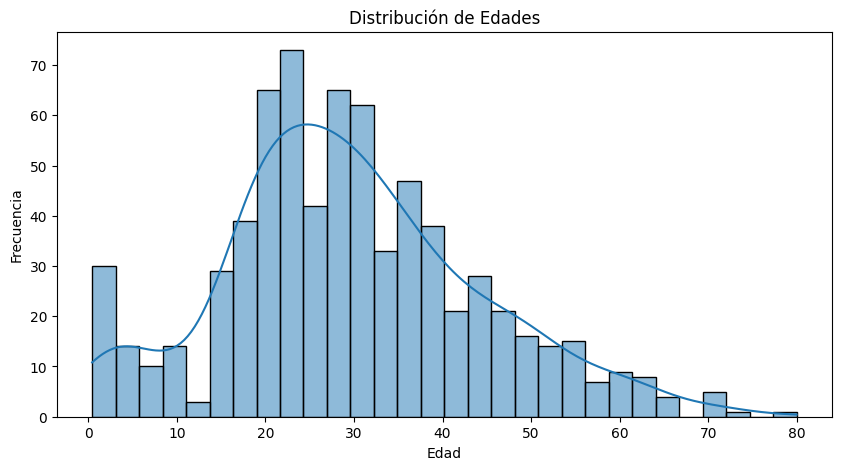

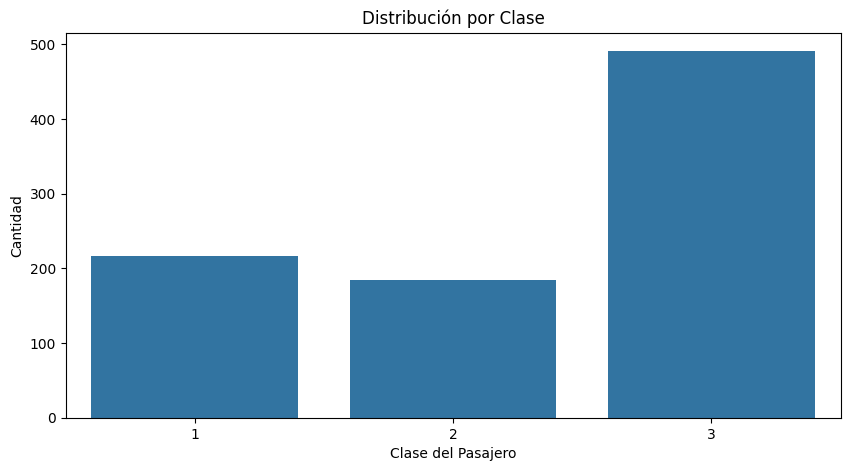

In [ ]:
# Gráficos de distribución de algunas variables relevantes
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=df)
plt.title("Distribución por Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Cantidad")
plt.show()

Tabla 1: Distribución de Edades (Histograma)

Muestra la frecuencia de las edades de los pasajeros, revelando la distribución de edades a bordo del Titanic.
Se puede observar la edad promedio, la dispersión de los datos, si hay grupos de edad predominantes o valores atípicos.
Permite identificar la concentración de pasajeros en ciertos rangos de edad.

Tabla 2: Distribución por Clase (Gráfico de barras)

Indica la cantidad de pasajeros que viajaban en cada clase (1ra, 2da y 3ra).
Permite comparar la proporción de pasajeros en cada clase.
Da una idea de la distribución socioeconómica de los pasajeros, ya que la clase del billete suele estar relacionada con el nivel económico.

In [ ]:
# Tasas de supervivencia globales y segmentadas
survival_rate = df['Survived'].mean()
print(f"Tasa de supervivencia general: {survival_rate:.2%}")

Tasa de supervivencia general: 38.38%


El código nos revela una verdad: solo el 38% de los pasajeros del Titanic lograron sobrevivir a la tragedia.

In [4]:
# Supervivencia por género
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Supervivencia por género:")
print(survival_by_gender * 100)  # Multiplicar por 100 para obtener el porcentaje

Supervivencia por género:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


Esta salida muestra que las mujeres tuvieron una tasa de supervivencia significativamente mayor (alrededor del 74%) en comparación con los hombres (alrededor del 19%) en el Titanic. Esto sugiere que el género jugó un papel importante en la determinación de las posibilidades de supervivencia durante el desastre. Este hallazgo es consistente con los relatos históricos, que indican que se dio prioridad a las mujeres y los niños durante la evacuación.

In [5]:
# Supervivencia por clase
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Supervivencia por clase:")
print(survival_by_class * 100)  # Multiplicar por 100 para obtener el porcentaje

Supervivencia por clase:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


Esta salida muestra que los pasajeros de primera clase tuvieron una tasa de supervivencia significativamente mayor (alrededor del 63%), seguidos por los de segunda clase (alrededor del 47%), y finalmente los de tercera clase (alrededor del 24%).

In [ ]:
duplicates = df[df.duplicated()]
print(f"Número de registros duplicados: {duplicates.shape[0]}")

Número de registros duplicados: 0


La evaluación y el manejo de registros duplicados son pasos cruciales en el proceso de análisis de datos. En el contexto del conjunto de datos del Titanic, la identificación y eliminación de duplicados garantiza la integridad de los datos y la precisión del análisis. Si bien el conjunto de datos del Titanic utilizado en este caso no contenía duplicados, es una buena práctica realizar siempre esta verificación para evitar posibles sesgos o resultados inexactos. La aplicación del método drop_duplicates() proporciona una solución eficiente para eliminar duplicados, asegurando que cada registro sea único y representativo de un pasajero individual. Este proceso contribuye a un análisis más confiable y a la construcción de modelos predictivos más robustos. En resumen, la atención a los detalles, como la detección y eliminación de registros duplicados, es fundamental para obtener información significativa y precisa a partir de los datos del Titanic

In [ ]:

# Imputación de la edad en función de la clase y el género
# Agrupar por clase y género, y calcular la mediana de la edad para cada grupo
age_median = df.groupby(['Pclass', 'Sex'])['Age'].median()

# Crear una función para imputar la edad
def imputar_edad(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        return age_median[Pclass][Sex]
    else:
        return Age

# Aplicar la función para imputar las edades faltantes
df['Age'] = df[['Age', 'Pclass', 'Sex']].apply(imputar_edad, axis=1)

# Eliminar la columna 'Cabin' debido al alto porcentaje de valores faltantes y su poca relevancia
df = df.drop('Cabin', axis=1)

# Eliminar los registros con valores faltantes en 'Embarked'
df = df.dropna()

# Verificar si aún hay valores nulos
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-13-e3dbb9325954>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-13-e3dbb9325954>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
<ipython-input-13-e3dbb9325954>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Sex = cols[2]


Este código realiza un preprocesamiento importante del conjunto de datos del Titanic al manejar los valores faltantes. La imputación de la edad utilizando la mediana basada en la clase y el género es una estrategia inteligente para rellenar los valores faltantes de una manera más informada, evitando sesgos. La eliminación de la columna Cabin y las filas con valores faltantes en Embarked también son decisiones justificadas para mejorar la calidad del conjunto de datos para el análisis posterior.

En general, este código proporciona un enfoque sólido para el manejo de valores faltantes en el conjunto de datos del Titanic, mejorando la integridad y confiabilidad de los datos para el análisis.

Espero que esta explicación sea útil. Avísame si tienes alguna otra pregunta.

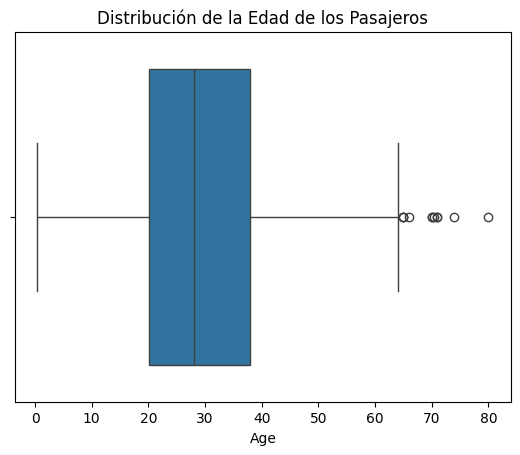

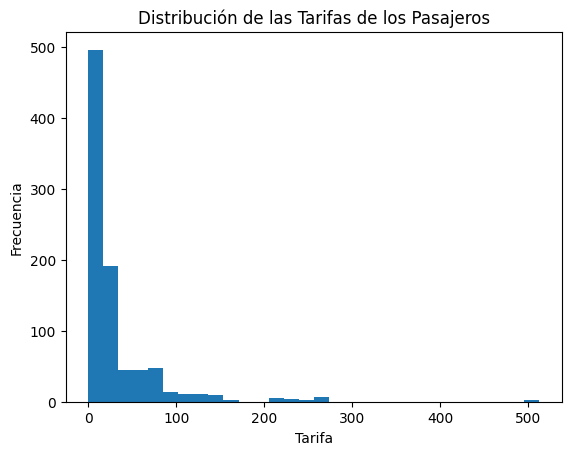

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot para 'Age'
sns.boxplot(x=df['Age'])
plt.title("Distribución de la Edad de los Pasajeros") # Título añadido
plt.show()

# Histograma para 'Fare'
plt.hist(df['Fare'], bins=30)
plt.title("Distribución de las Tarifas de los Pasajeros") # Título añadido
plt.xlabel("Tarifa") # Etiqueta del eje x añadida
plt.ylabel("Frecuencia") # Etiqueta del eje y añadida
plt.show()

El box plot de la edad muestra la distribucion de la edad de los pasajeros del Titanic, ademas mustra el rango intercuartil, dosnde se encuntra el 50% central de los datos.

El histograma de fare mustra la distribicion de las tarifas pagadas por los pasajeros, esto nos permite observar la forma de la distribucion

In [11]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]

print("Valores atípicos (outliers) en 'Age':\n", outliers)

Valores atípicos (outliers) en 'Age':
      Survived  Pclass                                  Name   Sex   Age  \
33          0       2                 Wheadon, Mr. Edward H  male  66.0   
54          0       1        Ostby, Mr. Engelhart Cornelius  male  65.0   
96          0       1             Goldschmidt, Mr. George B  male  71.0   
116         0       3                  Connors, Mr. Patrick  male  70.5   
280         0       3                      Duane, Mr. Frank  male  65.0   
456         0       1             Millet, Mr. Francis Davis  male  65.0   
493         0       1               Artagaveytia, Mr. Ramon  male  71.0   
630         1       1  Barkworth, Mr. Algernon Henry Wilson  male  80.0   
672         0       2           Mitchell, Mr. Henry Michael  male  70.0   
745         0       1          Crosby, Capt. Edward Gifford  male  70.0   
851         0       3                   Svensson, Mr. Johan  male  74.0   

     SibSp  Parch     Fare Cabin Embarked  
33       0      

muestra las edades que superan los 65 años, es para identificar que habia un grupo pequeño de edades avanzadas

In [7]:
# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=['number'])


correlation = numerical_features.corr()['Survived']

print(correlation)


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


Identificar las relaciones entre variables. Nos permite comprender que factores tuvieron mayor influencia en la supervivencia

| Columna | Moda | Mediana | Media | Análisis |
|---|---|---|---|---|
| PassengerId | No aplica (ID único) | 446 | 446 | La media y la mediana coinciden, lo que indica una distribución simétrica (aunque no sea relevante para un ID). |
| Survived | 0 | 0 | 0.38 | La moda y la mediana son 0, lo que indica que más pasajeros murieron que sobrevivieron. La media de 0.38 indica una tasa de supervivencia del 38%. |
| Pclass | 3 | 3 | 2.31 | La moda y la mediana son 3, lo que indica que la mayoría de los pasajeros viajaban en tercera clase. La media de 2.31 confirma esta tendencia. |
| Age | 24 | 28 | 29.7 | La edad promedio de los pasajeros era de 29.7 años. La mediana es ligeramente menor, lo que sugiere una ligera asimetría hacia la derecha en la distribución de edades.  |
| SibSp | 0 | 0 | 0.52 | La mayoría de los pasajeros viajaban sin hermanos ni cónyuges. La media de 0.52 indica que, en promedio, los pasajeros tenían menos de un hermano o cónyuge a bordo. |
| Parch | 0 | 0 | 0.38 | La mayoría de los pasajeros viajaban sin padres ni hijos. La media de 0.38 indica que, en promedio, los pasajeros tenían menos de un padre o hijo a bordo. |
| Fare | 8.05 | 14.45 | 32.2 | La tarifa promedio era de 32.2. La mediana es considerablemente menor, lo que indica una fuerte asimetría hacia la derecha en la distribución de tarifas, con algunos pasajeros pagando tarifas mucho más altas. |

la tabla proporciona información sobre la distribución de las variables en el dataset del Titanic. Las medidas de tendencia central y el análisis de cada columna nos permiten comprender las características generales de los pasajeros, como la tasa de supervivencia, la clase social, la edad, la composición familiar y la tarifa pagada.